# O objetivo desse estudo é aplicar análises exploratórias e técnicas de regressão para identificar quais características afetam mais as vendas de imóveis habitacionais na cidade de Nova York 

In [1]:
#Importando Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Carregando o DataFrame
nychouse = pd.read_csv('nyc-rolling-sales.csv')

In [3]:
#Primeiras 5 linhas do DataFrame
nychouse.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
#Dimensões do DataFrame
print(nychouse.shape)

(84548, 22)


In [5]:
#Estatísticas descritivas do Dataframe
nychouse.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [6]:
#Excluindo coluna
nychouse.drop(columns = ['Unnamed: 0'], inplace = True)

In [7]:
#Tipos de dados em cada coluna
nychouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT NUMBER                84548 non-null  object
 10  ZIP CODE                        84548 non-null  int64 
 11  RESIDENTIAL UNITS               84548 non-null  int64 
 12  COMMERCIAL UNITS                84548 non-null

In [8]:
# Convertendo 'object' para 'category'
obj_cats = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'BUILDING CLASS AT TIME OF SALE']

for colname in obj_cats:
    nychouse[colname] = nychouse[colname].astype('category')

In [9]:
# Convertendo 'numeric' para 'category'
num_cats = ['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE',
            'TAX CLASS AT TIME OF SALE']

for colname in num_cats:
    nychouse[colname] = nychouse[colname].astype('category')  

In [10]:
nychouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         84548 non-null  category
 1   NEIGHBORHOOD                    84548 non-null  category
 2   BUILDING CLASS CATEGORY         84548 non-null  category
 3   TAX CLASS AT PRESENT            84548 non-null  category
 4   BLOCK                           84548 non-null  category
 5   LOT                             84548 non-null  category
 6   EASE-MENT                       84548 non-null  category
 7   BUILDING CLASS AT PRESENT       84548 non-null  category
 8   ADDRESS                         84548 non-null  category
 9   APARTMENT NUMBER                84548 non-null  category
 10  ZIP CODE                        84548 non-null  category
 11  RESIDENTIAL UNITS               84548 non-null  int64   
 12  COMMERCIAL UNITS  

In [11]:
#Convertendo as colunas para o tipo de dados numérico 
numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE']
for col in numer: 
    nychouse[col] = pd.to_numeric(nychouse[col], errors='coerce')

In [12]:
#Convertendo para "datas e horas"
nychouse['SALE DATE'] = pd.to_datetime(nychouse['SALE DATE'])

In [13]:
nychouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  category      
 5   LOT                             84548 non-null  category      
 6   EASE-MENT                       84548 non-null  category      
 7   BUILDING CLASS AT PRESENT       84548 non-null  category      
 8   ADDRESS                         84548 non-null  category      
 9   APARTMENT NUMBER                84548 non-null  category      
 10  ZIP CODE                        84548 non-null  category      
 11  RE

In [14]:
nychouse.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


In [15]:
#substituindo o espaço vazio e adicionando o "_" para facilitar o processamento 
nychouse.columns = nychouse.columns.str.replace(' ', '_')

In [16]:
#colocando os nomes em letra minisuculas para facilitar o processamento
nychouse.columns = nychouse.columns.str.lower()
nychouse.columns

Index(['borough', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'block', 'lot', 'ease-ment',
       'building_class_at_present', 'address', 'apartment_number', 'zip_code',
       'residential_units', 'commercial_units', 'total_units',
       'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price', 'sale_date'],
      dtype='object')

In [17]:
#Criando uma coluna para "age"
nychouse['age'] = 2021 - nychouse['year_built']

#A construção é antes ou depois da Guerra
nychouse['age_category'] = np.where(nychouse['age']>=76,'Pre-War','Post-War')

# Convertendo para Category
nychouse['age_category'] = nychouse['age_category'].astype('category')
nychouse

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age,age_category
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,121,Pre-War
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14,121,Pre-War
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09,121,Pre-War
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,108,Pre-War
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,121,Pre-War
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28,23,Post-War
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21,23,Post-War
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05,96,Pre-War
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,...,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21,20,Post-War


In [18]:
#Substituindo os numeros pelo seus respectivos valores em str
nychouse['borough'] = nychouse['borough'].astype(str)
nychouse['borough'] = nychouse['borough'].str.replace("1", "Manhattan")
nychouse['borough'] = nychouse['borough'].str.replace("2", "Bronx")
nychouse['borough'] = nychouse['borough'].str.replace("3", "Brooklyn")
nychouse['borough'] = nychouse['borough'].str.replace("4", "Queens")
nychouse['borough'] = nychouse['borough'].str.replace("5", "Staten Island")
nychouse

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age,age_category
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,121,Pre-War
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14,121,Pre-War
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09,121,Pre-War
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,108,Pre-War
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,121,Pre-War
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28,23,Post-War
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21,23,Post-War
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05,96,Pre-War
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,...,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21,20,Post-War


In [19]:
# Somando os valores nulos
nychouse.isnull().sum()

borough                               0
neighborhood                          0
building_class_category               0
tax_class_at_present                  0
block                                 0
lot                                   0
ease-ment                             0
building_class_at_present             0
address                               0
apartment_number                      0
zip_code                              0
residential_units                     0
commercial_units                      0
total_units                           0
land_square_feet                  26252
gross_square_feet                 27612
year_built                            0
tax_class_at_time_of_sale             0
building_class_at_time_of_sale        0
sale_price                        14561
sale_date                             0
age                                   0
age_category                          0
dtype: int64

In [20]:
# Porcentagem de valores nulos
nychouse.isnull().sum()/len(nychouse)*100

borough                            0.000000
neighborhood                       0.000000
building_class_category            0.000000
tax_class_at_present               0.000000
block                              0.000000
lot                                0.000000
ease-ment                          0.000000
building_class_at_present          0.000000
address                            0.000000
apartment_number                   0.000000
zip_code                           0.000000
residential_units                  0.000000
commercial_units                   0.000000
total_units                        0.000000
land_square_feet                  31.049818
gross_square_feet                 32.658372
year_built                         0.000000
tax_class_at_time_of_sale          0.000000
building_class_at_time_of_sale     0.000000
sale_price                        17.222170
sale_date                          0.000000
age                                0.000000
age_category                    

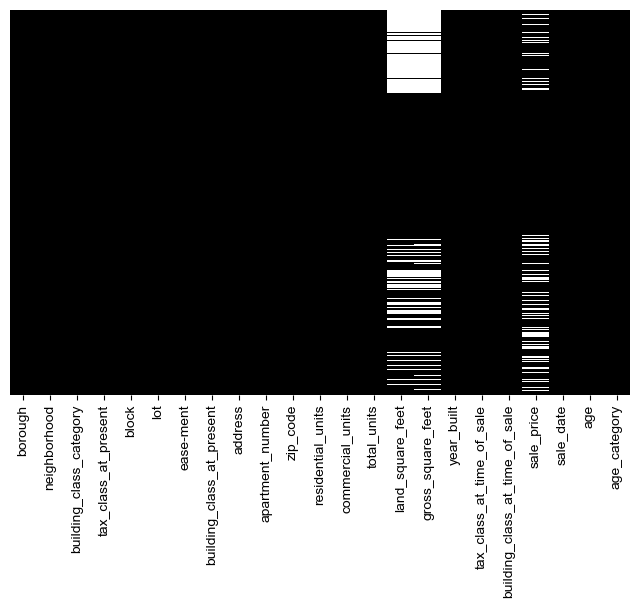

In [21]:
# Visualizando os valores nulos
fig, ax = plt.subplots(figsize=(8,5))
sns.set(font_scale=1)
sns.heatmap(nychouse.isnull(),yticklabels = False, cbar = False, cmap = 'Greys_r')
plt.show()

Existem valores nulos por algumas razões e entre ela a de que o imovel foi repassado para outro familiar, ou seja, não houve dinheiro envolvido. Por esse motivo é mais seguro eliminar essas linhas do Dataframe

In [22]:
# Removendo linhas com dados faltantes
nychouse = nychouse.dropna()

In [23]:
#Vendo se ainda tem valores nulos
nychouse.isnull().sum()

borough                           0
neighborhood                      0
building_class_category           0
tax_class_at_present              0
block                             0
lot                               0
ease-ment                         0
building_class_at_present         0
address                           0
apartment_number                  0
zip_code                          0
residential_units                 0
commercial_units                  0
total_units                       0
land_square_feet                  0
gross_square_feet                 0
year_built                        0
tax_class_at_time_of_sale         0
building_class_at_time_of_sale    0
sale_price                        0
sale_date                         0
age                               0
age_category                      0
dtype: int64

In [24]:
#Gerando estatísticas resumidas do DataFrame 
nychouse.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

,count,mean,min,25%,50%,75%,max,std
residential_units,48244.00000,2.56654,0.00000,1.00000,1.00000,2.00000,1844.00000,17.46548
commercial_units,48244.00000,0.24917,0.00000,0.00000,0.00000,0.00000,2261.00000,10.98807
total_units,48244.00000,2.83463,0.00000,1.00000,1.00000,2.00000,2261.00000,20.75042
land_square_feet,48244.00000,3358.11655,0.00000,1413.00000,2140.00000,3071.00000,4228300.00000,31435.89670
gross_square_feet,48244.00000,3669.75253,0.00000,828.00000,1620.00000,2520.00000,3750565.00000,29474.91185
year_built,48244.00000,1827.76517,0.00000,1920.00000,1931.00000,1961.00000,2017.00000,464.36115
sale_price,48244.00000,1153281.44582,0.00000,80420.00000,480000.00000,830000.00000,2210000000.00000,13401309.19358
sale_date,48244.00000,.5f,.5f,.5f,.5f,.5f,.5f,nan
age,48244.00000,193.23483,4.00000,60.00000,90.00000,101.00000,2021.00000,464.36115


In [25]:
#Analisando o Dataframe onde 'year_built' é 0
nychouse[nychouse['year_built']==0]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age,age_category
18364,Bronx,BATHGATE,29 COMMERCIAL GARAGES,4,2918,29,,G7,1885 BATHGATE AVENUE,,...,0,3070.0,0.0,0,4,G7,2500000.0,2016-12-15,2021,Pre-War
18371,Bronx,BATHGATE,31 COMMERCIAL VACANT LAND,4,3028,13,,V9,1996 WEBSTER AVENUE,,...,0,5945.0,0.0,0,4,V9,1200000.0,2016-10-19,2021,Pre-War
18373,Bronx,BATHGATE,41 TAX CLASS 4 - OTHER,4,2900,1,,Z9,1816 WEBSTER AVENUE,,...,0,3082.0,0.0,0,4,Z9,300000.0,2016-11-03,2021,Pre-War
18756,Bronx,BAYCHESTER,05 TAX CLASS 1 VACANT LAND,1B,4725,26,,V0,1475 HICKS STREET,,...,0,2375.0,0.0,0,1,V0,98000.0,2016-10-31,2021,Pre-War
18757,Bronx,BAYCHESTER,05 TAX CLASS 1 VACANT LAND,1B,4726,38,,V0,3552 EASTCHESTER ROAD,,...,0,3400.0,0.0,0,1,V0,0.0,2017-03-16,2021,Pre-War
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53841,Queens,CORONA,07 RENTALS - WALKUP APARTMENTS,2B,1785,22,,C1,112-48 38TH AVENUE,,...,8,2500.0,6875.0,0,2,C1,2153222.0,2017-05-10,2021,Pre-War
54054,Queens,CORONA,41 TAX CLASS 4 - OTHER,4,1961,1,,Z9,5506 VAN CLEEF STREET,,...,0,926.0,384.0,0,4,Z9,113000.0,2017-08-09,2021,Pre-War
57321,Queens,FLUSHING-NORTH,08 RENTALS - ELEVATOR APARTMENTS,2B,5186,56,,D3,142-11 CHERRY AVENUE,,...,10,2850.0,10111.0,0,2,D3,4000000.0,2017-05-19,2021,Pre-War
65906,Queens,LITTLE NECK,01 ONE FAMILY DWELLINGS,1,8229,80,,A3,45-39 BROWVALE LANE,,...,1,9562.0,5291.0,0,1,A3,1731025.0,2017-04-06,2021,Pre-War


In [26]:
#Analisando quantos casos o 'year_built' é menor que zero e criando uma variavel com o nome 'zero' para armazenar esses casos
zero = nychouse[nychouse['year_built']==0] 
count = zero.count() 

print(count)

borough                           2911
neighborhood                      2911
building_class_category           2911
tax_class_at_present              2911
block                             2911
lot                               2911
ease-ment                         2911
building_class_at_present         2911
address                           2911
apartment_number                  2911
zip_code                          2911
residential_units                 2911
commercial_units                  2911
total_units                       2911
land_square_feet                  2911
gross_square_feet                 2911
year_built                        2911
tax_class_at_time_of_sale         2911
building_class_at_time_of_sale    2911
sale_price                        2911
sale_date                         2911
age                               2911
age_category                      2911
dtype: int64


In [27]:
#Removendo as linhas onde o 'year_built' = 0
nychouse = nychouse[nychouse['year_built']!=0]
nychouse

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age,age_category
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,121,Pre-War
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,108,Pre-War
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,121,Pre-War
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,101,Pre-War
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07,101,Pre-War
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28,23,Post-War
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21,23,Post-War
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05,96,Pre-War
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,...,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21,20,Post-War


# Outliers

Analisando outros valores onde "land e gross square feet" é zero. Podem ser valores discrepantes em potencial.

In [28]:
nychouse[nychouse['land_square_feet']==0]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age,age_category
18354,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,,D4,"463 EAST 178TH STREET, 6E",,...,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17,86,Pre-War
18355,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,,D4,"463 EAST 178TH ST, 6B",,...,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17,86,Pre-War
18356,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3044,40,,D4,"495 E 178TH STREET, 2H",,...,0,0.0,0.0,1941,2,D4,60000.0,2016-12-01,80,Pre-War
18746,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1009,,R3,2877 ELY AVENUE,3,...,1,0.0,0.0,2008,1,R3,310000.0,2017-02-28,13,Post-War
18747,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1027,,R3,2853 ELY AVENUE,3,...,1,0.0,0.0,2008,1,R3,342500.0,2017-07-31,13,Post-War
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49292,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,,RP,207 PROSPECT PARK SW,P35,...,1,0.0,0.0,1990,4,RP,0.0,2017-07-25,31,Post-War
49293,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,,RP,207 PROSPECT PARK SW,P35,...,1,0.0,0.0,1990,4,RP,0.0,2017-07-17,31,Post-War
49294,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1213,,RS,11 TERRACE PLACE,S2,...,1,0.0,0.0,2006,4,RS,0.0,2016-10-06,15,Post-War
49295,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1219,,RS,11 TERRACE PLACE,S8,...,1,0.0,0.0,2006,4,RS,0.0,2016-10-24,15,Post-War


Existem 8.345 linhas onde o 'land square feet' é zero. Definitivamente não é possível haver unidades habitacionais com 'land square feet' igual a zero.

In [29]:
nychouse[nychouse['gross_square_feet']==0]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age,age_category
18354,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,,D4,"463 EAST 178TH STREET, 6E",,...,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17,86,Pre-War
18355,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,,D4,"463 EAST 178TH ST, 6B",,...,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17,86,Pre-War
18356,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3044,40,,D4,"495 E 178TH STREET, 2H",,...,0,0.0,0.0,1941,2,D4,60000.0,2016-12-01,80,Pre-War
18746,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1009,,R3,2877 ELY AVENUE,3,...,1,0.0,0.0,2008,1,R3,310000.0,2017-02-28,13,Post-War
18747,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1027,,R3,2853 ELY AVENUE,3,...,1,0.0,0.0,2008,1,R3,342500.0,2017-07-31,13,Post-War
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49292,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,,RP,207 PROSPECT PARK SW,P35,...,1,0.0,0.0,1990,4,RP,0.0,2017-07-25,31,Post-War
49293,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,,RP,207 PROSPECT PARK SW,P35,...,1,0.0,0.0,1990,4,RP,0.0,2017-07-17,31,Post-War
49294,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1213,,RS,11 TERRACE PLACE,S2,...,1,0.0,0.0,2006,4,RS,0.0,2016-10-06,15,Post-War
49295,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1219,,RS,11 TERRACE PLACE,S8,...,1,0.0,0.0,2006,4,RS,0.0,2016-10-24,15,Post-War


Existem 8.522 linhas onde o 'gross square feet' é zero. Tambem, definitivamente, não é possível haver unidades habitacionais com 'gross square feet' igual a zero.

In [30]:
#Removendo esses 'outliers' do 'land_square_feet' e do 'gross_square_feet'
nychouse = nychouse[nychouse['land_square_feet']!=0]
nychouse = nychouse[nychouse['gross_square_feet']!=0]

# Verificando
nychouse.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

,count,mean,min,25%,50%,75%,max,std
residential_units,36805.00000,3.18209,0.00000,1.00000,2.00000,2.00000,1844.00000,19.82145
commercial_units,36805.00000,0.32319,0.00000,0.00000,0.00000,0.00000,2261.00000,12.57908
total_units,36805.00000,3.50406,0.00000,1.00000,2.00000,2.00000,2261.00000,23.60379
land_square_feet,36805.00000,4197.33422,200.00000,2000.00000,2500.00000,3800.00000,4228300.00000,35778.41850
gross_square_feet,36805.00000,4790.49126,60.00000,1428.00000,2000.00000,2898.00000,3750565.00000,33637.49347
year_built,36805.00000,1939.07811,1800.00000,1920.00000,1930.00000,1955.00000,2017.00000,30.28128
sale_price,36805.00000,1305840.98310,0.00000,160000.00000,504237.00000,840000.00000,2210000000.00000,15185705.88870
sale_date,36805.00000,.5f,.5f,.5f,.5f,.5f,.5f,nan
age,36805.00000,81.92189,4.00000,66.00000,91.00000,101.00000,221.00000,30.28128


Analisando as informações acima, aparentemente o "sales_price" tem algum(s) valores discrepantes

<Axes: xlabel='age', ylabel='sale_price'>

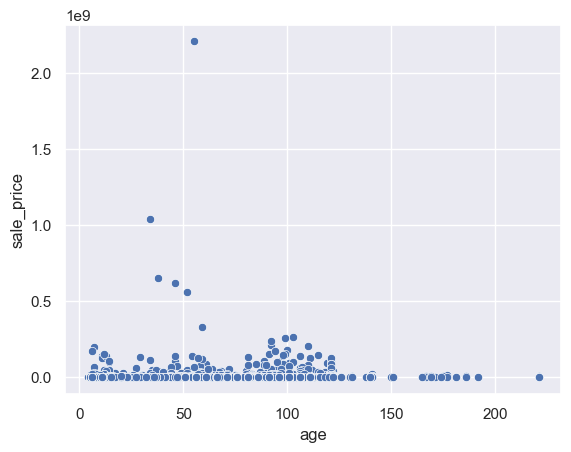

In [31]:
#Usando o scatter plot pra achar um possivel outliers em "sales_price"
sns.scatterplot(data=nychouse, x="age", y="sale_price")

In [32]:
#Removendo os outlier no "sales_price"
nychouse = nychouse[nychouse['sale_price'] <500000000] 

<Axes: xlabel='age', ylabel='sale_price'>

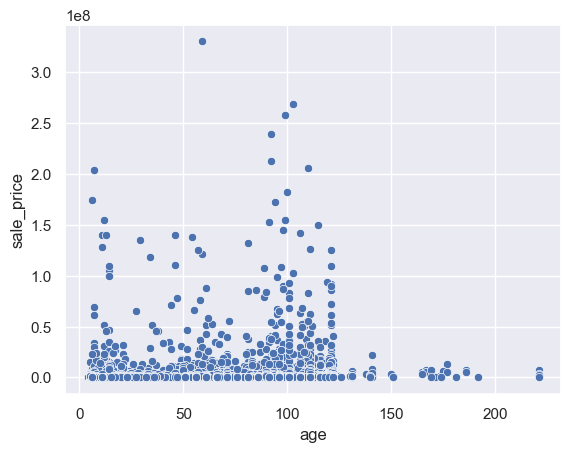

In [33]:
sns.scatterplot(data=nychouse, x="age", y="sale_price")

# Análise e limpeza de dados

C:\Users\thiag\AppData\Local\Temp\ipykernel_4324\2774397731.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nychouse['sale_price'], kde = True, hist_kws=dict(edgecolor="k"))


<Axes: xlabel='sale_price', ylabel='Density'>

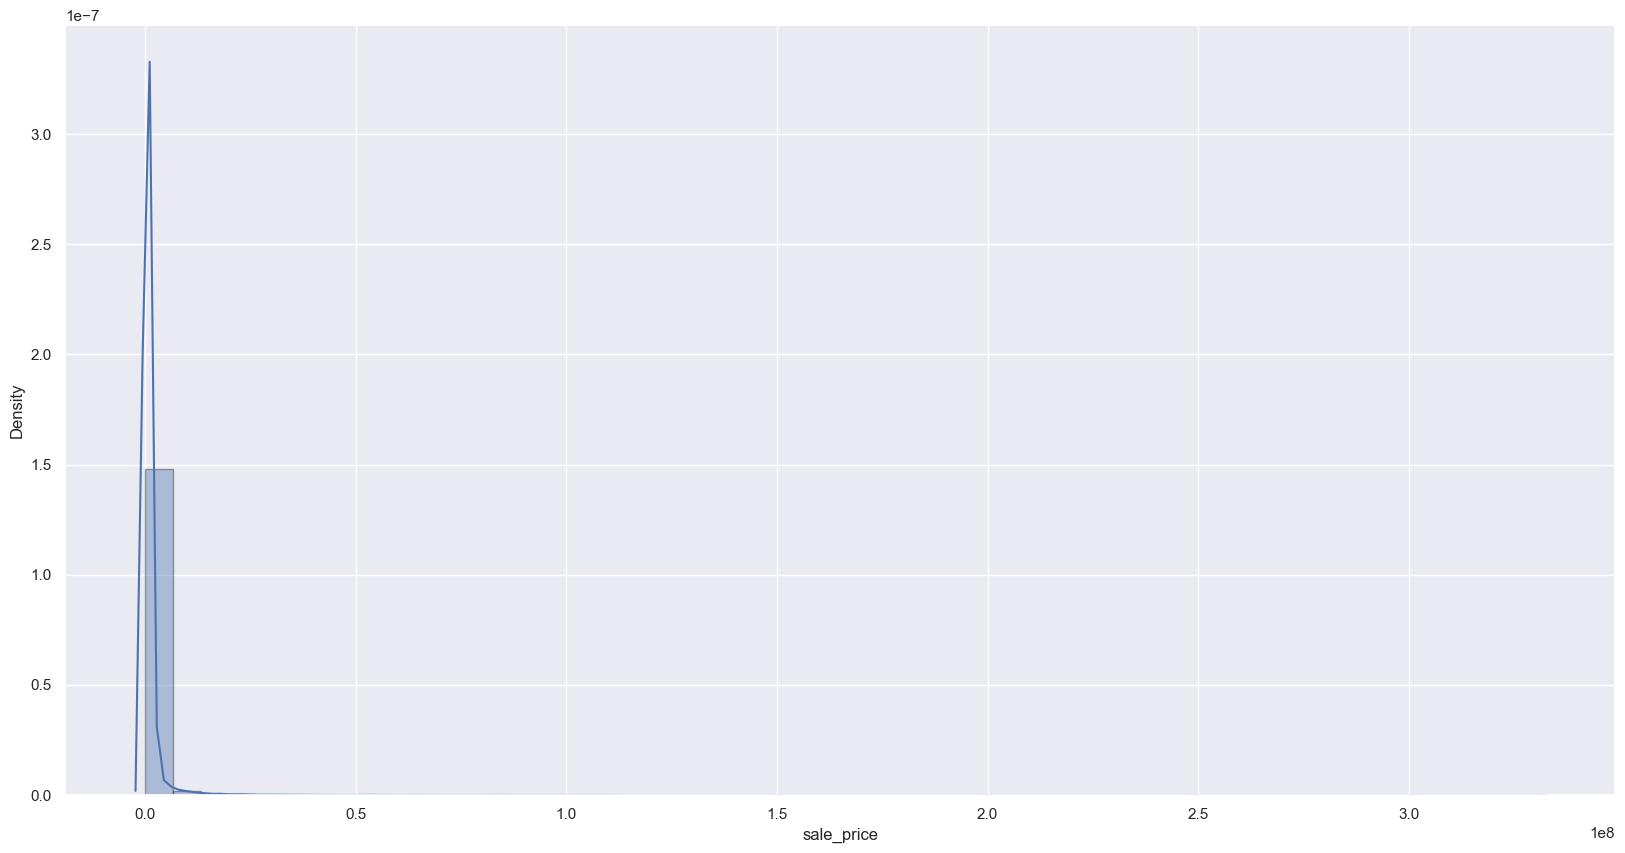

In [34]:
#Criando 'plot distribution' das casas com o preço de compra abaixo dos $500,000,000
plt.figure(figsize = (20,10))
sns.distplot(nychouse['sale_price'], kde = True, hist_kws=dict(edgecolor="k"))

In [35]:
#Criando um novo Dataframe com casas com valores abaixo dos $5,000,000 
new_nychouse = nychouse[nychouse['sale_price'] <5000000] 

In [36]:
new_nychouse.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

,count,mean,min,25%,50%,75%,max,std
residential_units,35693.00000,2.49181,0.00000,1.00000,2.00000,2.00000,1844.00000,14.71587
commercial_units,35693.00000,0.22439,0.00000,0.00000,0.00000,0.00000,2261.00000,12.08858
total_units,35693.00000,2.71515,0.00000,1.00000,2.00000,2.00000,2261.00000,19.13044
land_square_feet,35693.00000,3787.15518,200.00000,2000.00000,2500.00000,3645.00000,4228300.00000,31837.51462
gross_square_feet,35693.00000,3594.99821,60.00000,1408.00000,1970.00000,2772.00000,3750565.00000,27516.35693
year_built,35693.00000,1939.40375,1800.00000,1920.00000,1930.00000,1955.00000,2017.00000,30.22773
sale_price,35693.00000,605425.59171,0.00000,106500.00000,495000.00000,799000.00000,4975000.00000,657964.67148
sale_date,35693.00000,.5f,.5f,.5f,.5f,.5f,.5f,nan
age,35693.00000,81.59625,4.00000,66.00000,91.00000,101.00000,221.00000,30.22773


<Axes: xlabel='age', ylabel='sale_price'>

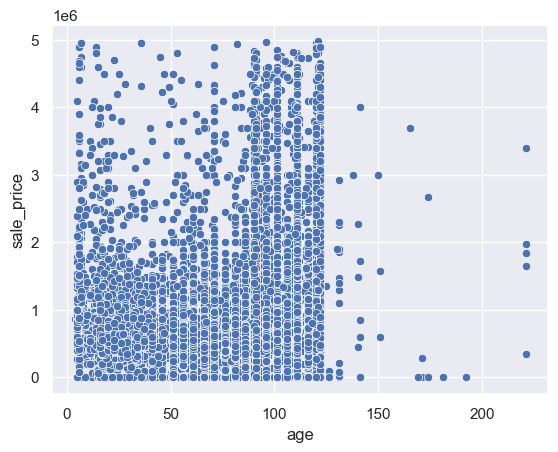

In [37]:
#Analisando no scatterplot novamente
sns.scatterplot(data=new_nychouse, x="age", y="sale_price")

C:\Users\thiag\AppData\Local\Temp\ipykernel_4324\24105022.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_nychouse['sale_price'], kde = True, hist_kws=dict(edgecolor="k"))


<Axes: xlabel='sale_price', ylabel='Density'>

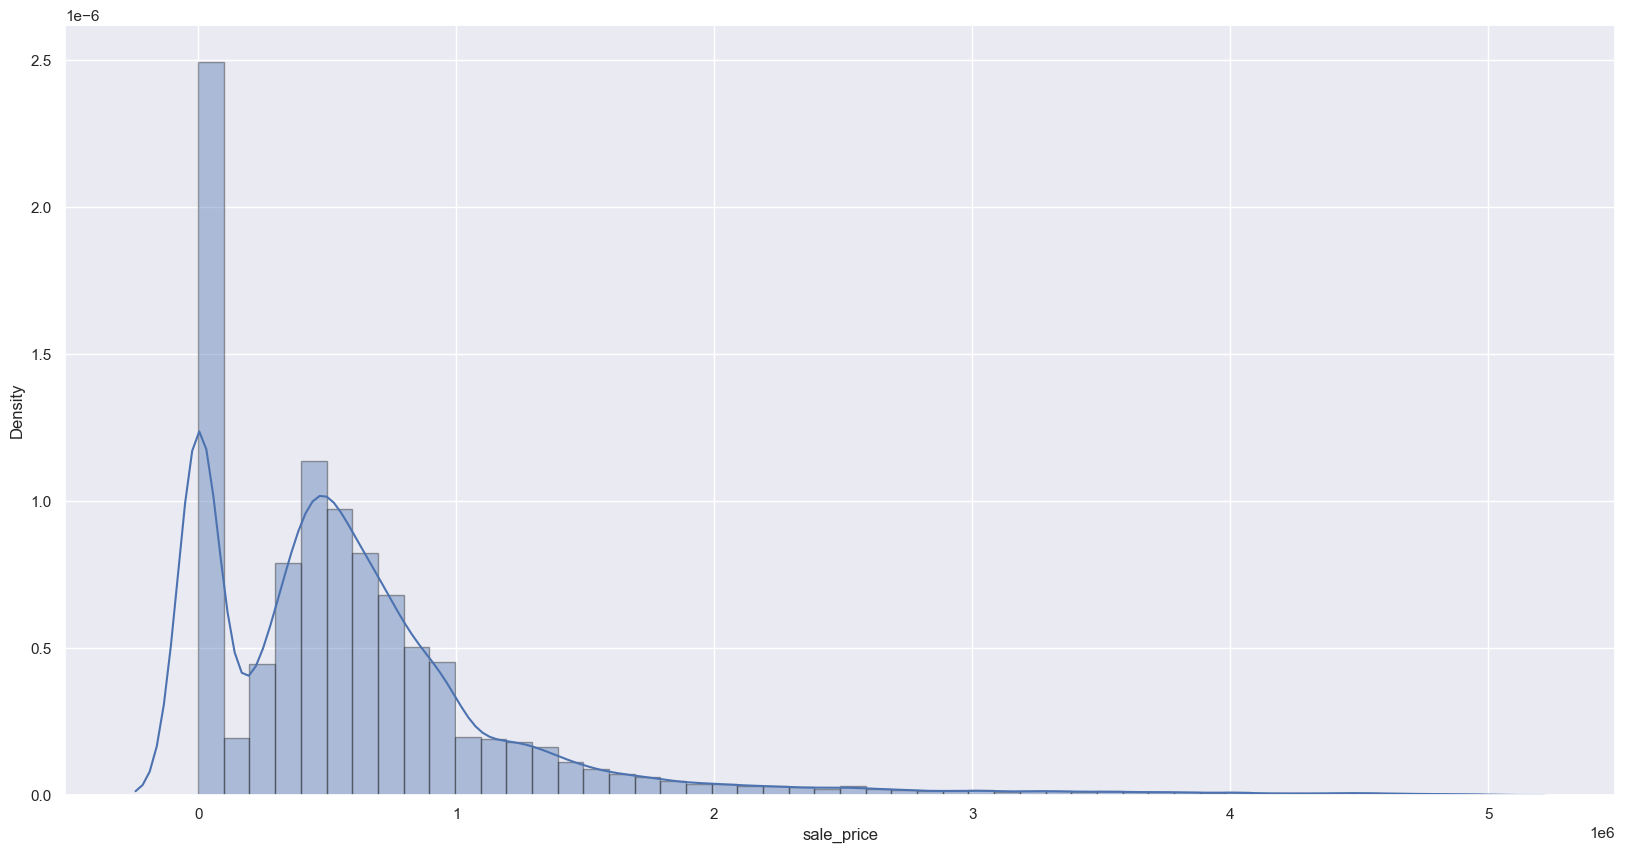

In [38]:
#create distribution plot of housing sale prices below $500,000,000
plt.figure(figsize = (20,10))
sns.distplot(new_nychouse['sale_price'], kde = True, hist_kws=dict(edgecolor="k"))

Depois de remover os valores discrepantes acima de US$ 500.000.000, a variável de preço de venda parece estar normalmente distribuída e distorcida para a direita. Agora vamos remover ainda mais os preços de venda onde o sale_price = 0 e confirmar ainda mais a distribuição dos preços de venda no mercado imobiliário de Nova York.

In [39]:
#Criando um Dataframe onde o 'sales_price' não é 0 e é abaixo de $5.000.000
new_nychouse = nychouse[(nychouse['sale_price'] <5000000) & (nychouse['sale_price'] != 0)] 

In [40]:
new_nychouse.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

,count,mean,min,25%,50%,75%,max,std
residential_units,28207.00000,2.17109,0.00000,1.00000,2.00000,2.00000,1844.00000,13.33397
commercial_units,28207.00000,0.20470,0.00000,0.00000,0.00000,0.00000,2261.00000,13.51836
total_units,28207.00000,2.37462,0.00000,1.00000,2.00000,2.00000,2261.00000,19.07034
land_square_feet,28207.00000,3814.92076,200.00000,2000.00000,2500.00000,3880.00000,4228300.00000,35284.42440
gross_square_feet,28207.00000,3106.44152,120.00000,1348.00000,1827.00000,2530.00000,3750565.00000,26358.64327
year_built,28207.00000,1941.18194,1800.00000,1920.00000,1930.00000,1960.00000,2017.00000,30.44789
sale_price,28207.00000,766102.58606,1.00000,410000.00000,600000.00000,900000.00000,4975000.00000,651702.65398
sale_date,28207.00000,.5f,.5f,.5f,.5f,.5f,.5f,nan
age,28207.00000,79.81806,4.00000,61.00000,91.00000,101.00000,221.00000,30.44789


O novo dataframe agora inclui propriedades com preços de venda diferentes de 0. Mas existem alguns outros valores discrepantes em potencial nas categorias 'land_square_feet' e 'gross_square_feet' que podem influenciar os outros pontos de dados.
O proximo passo é criar um filtro para identificar os valores máximos de 'land_square_feet' e 'gross_square_feet'.

<Axes: xlabel='land_square_feet', ylabel='sale_price'>

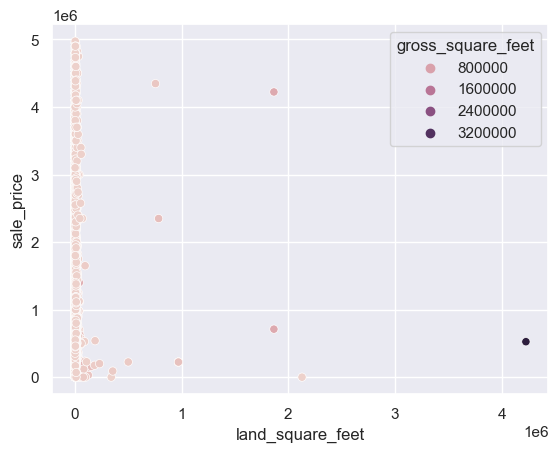

In [41]:
#Plots de 'land_square_feet' e 'gross_square_feet' com relação ao 'price'. 
sns.scatterplot(data=new_nychouse, x="land_square_feet", y="sale_price", hue = "gross_square_feet")

In [42]:
#Criando um filtro para land_square_feet com valores acima de 1,000,000 SF
land_filter = (new_nychouse['land_square_feet'] > 1000000)

#Criando um filtro para Gross_square_feet com valores acima de 1,000,000 SF
gross_filter = (new_nychouse['gross_square_feet'] > 1000000)

In [43]:
#Analisando as casas no parametro do filtro
new_nychouse[land_filter]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age,age_category
61460,Queens,GLEN OAKS,10 COOPS - ELEVATOR APARTMENTS,2,8489,1,,D4,26910 GRAND CENTRAL PARKWA,,...,1866,4228300.0,3750565.0,1972,2,D4,525000.0,2017-07-05,49,Post-War
81334,Staten Island,NEW SPRINGVILLE,22 STORE BUILDINGS,4,2400,180,,K6,2655 RICHMOND AVENUE,,...,126,1865243.0,683200.0,1975,4,K6,711008.0,2017-03-17,46,Post-War
81335,Staten Island,NEW SPRINGVILLE,22 STORE BUILDINGS,4,2400,180,,K6,2655 RICHMOND AVENUE,,...,126,1865243.0,683200.0,1975,4,K6,4223025.0,2017-03-17,46,Post-War
83181,Staten Island,TODT HILL,33 EDUCATIONAL FACILITIES,4,683,1,,W1,715 OCEAN TERRACE,,...,1,2128899.0,240.0,1965,4,W1,1.0,2016-11-14,56,Post-War


In [44]:
#Analisando as casas no parametro do filtro
new_nychouse[gross_filter]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age,age_category
61460,Queens,GLEN OAKS,10 COOPS - ELEVATOR APARTMENTS,2,8489,1,,D4,26910 GRAND CENTRAL PARKWA,,...,1866,4228300.0,3750565.0,1972,2,D4,525000.0,2017-07-05,49,Post-War


Ao isolar as propriedades acima, há resultados que produzem uma 'gross square feet area'  MENOR que a 'land square feet area'  do terreno, o que não deveria ser verdade. Assim, vamos remover ainda mais esses resultados como parte do conjunto de dataframe. Além disso, existem muitos valores discrepantes nos limites inferior e superior da distribuição. É necessario definir um limite máximo de 75% para o conjunto de dados, já que a porcentagem de 75% do conjunto de dados representa um bom ponto de corte para a maioria das métricas de pés quadrados das casas.

Há também propriedades sendo vendidas a preços absurdamente baixos. Limitarei ainda mais o conjunto de dados para incluir apenas propriedades superiores a $ 1.000.

In [45]:
new_nychouse = nychouse[(nychouse['sale_price'] <5000000) #limite de até $5,000,000 
                       & (nychouse['sale_price'] > 1000) #removendo todas as propriedades menores que $1,000
                       & (nychouse['residential_units'] < 500) #limite até 500 units
                       & (nychouse['commercial_units'] < 500) #limite até 500 units
                       & (nychouse['land_square_feet'] < nychouse['gross_square_feet']) #removendo instâncias onde 'land squarefeet' é maior que o 'Gross squarefeet'
                       & (nychouse['gross_square_feet'] < 2530) #removendo instâncias onde Gross squarefeet é maior que 2530 squarefeet
                       & (nychouse['gross_square_feet'] > 120)] #removendo instâncias onde Gross squarefeet é menor que 120 squarefeet

In [46]:
#Removendo valores duplicado
new_nychouse.drop_duplicates()

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age,age_category
1078,Manhattan,CHINATOWN,22 STORE BUILDINGS,4,162,47,,K4,10-14 DOYERS STREET,,...,4,892.0,1784.0,1920,4,K4,3000000.0,2017-07-31,101,Pre-War
4172,Manhattan,GREENWICH VILLAGE-WEST,01 ONE FAMILY DWELLINGS,1,585,69,,A5,2 GROVE COURT,,...,1,384.0,1152.0,1901,1,A5,1375000.0,2016-10-07,120,Pre-War
4174,Manhattan,GREENWICH VILLAGE-WEST,01 ONE FAMILY DWELLINGS,1,606,28,,S1,66 GREENWICH AVENUE,,...,2,925.0,2337.0,1910,1,S1,4065000.0,2017-08-03,111,Pre-War
4832,Manhattan,HARLEM-CENTRAL,02 TWO FAMILY DWELLINGS,1,1950,7,,B3,357 WEST 123 STREET,,...,2,1598.0,2340.0,1899,1,B3,2460000.0,2017-05-17,122,Pre-War
4881,Manhattan,HARLEM-CENTRAL,07 RENTALS - WALKUP APARTMENTS,2A,1726,22,,C3,35 WEST 128 STREET,,...,4,1249.0,2058.0,1910,2,C3,1431326.0,2017-08-07,111,Pre-War
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84486,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,7317,226,,A5,19 PEMBROOK LOOP,,...,1,1616.0,2137.0,1992,1,A5,417500.0,2016-11-15,29,Post-War
84487,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,7317,246,,A5,61 PEMBROOK LOOP,,...,1,1428.0,2206.0,1992,1,A5,470000.0,2017-05-04,29,Post-War
84488,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,7317,280,,A5,131 PEMBROOK LOOP,,...,1,1669.0,1828.0,1993,1,A5,425000.0,2017-07-10,28,Post-War
84489,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,7317,311,,A5,203 PEMBROOK LOOP,,...,1,1360.0,1672.0,1992,1,A5,354000.0,2016-09-12,29,Post-War


In [47]:
#Analisando o Dataframe depois das mudanças
new_nychouse.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

,count,mean,min,25%,50%,75%,max,std
residential_units,2818.00000,1.85735,0.00000,1.00000,2.00000,2.00000,11.00000,0.87781
commercial_units,2818.00000,0.08943,0.00000,0.00000,0.00000,0.00000,3.00000,0.33464
total_units,2818.00000,1.94606,1.00000,1.00000,2.00000,2.00000,11.00000,0.88047
land_square_feet,2818.00000,1625.78673,200.00000,1369.25000,1729.50000,2000.00000,2504.00000,433.16440
gross_square_feet,2818.00000,2002.29524,700.00000,1800.00000,2080.00000,2285.75000,2529.00000,381.50841
year_built,2818.00000,1939.56388,1847.00000,1910.00000,1930.00000,1965.00000,2016.00000,36.91733
sale_price,2818.00000,790275.84741,2000.00000,413698.50000,649500.00000,980000.00000,4500000.00000,582049.00624
sale_date,2818.00000,.5f,.5f,.5f,.5f,.5f,.5f,nan
age,2818.00000,81.43612,5.00000,56.00000,91.00000,111.00000,174.00000,36.91733


C:\Users\thiag\AppData\Local\Temp\ipykernel_4324\956123096.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_nychouse['sale_price'], kde = True, hist_kws=dict(edgecolor="k"))


<Axes: xlabel='sale_price', ylabel='Density'>

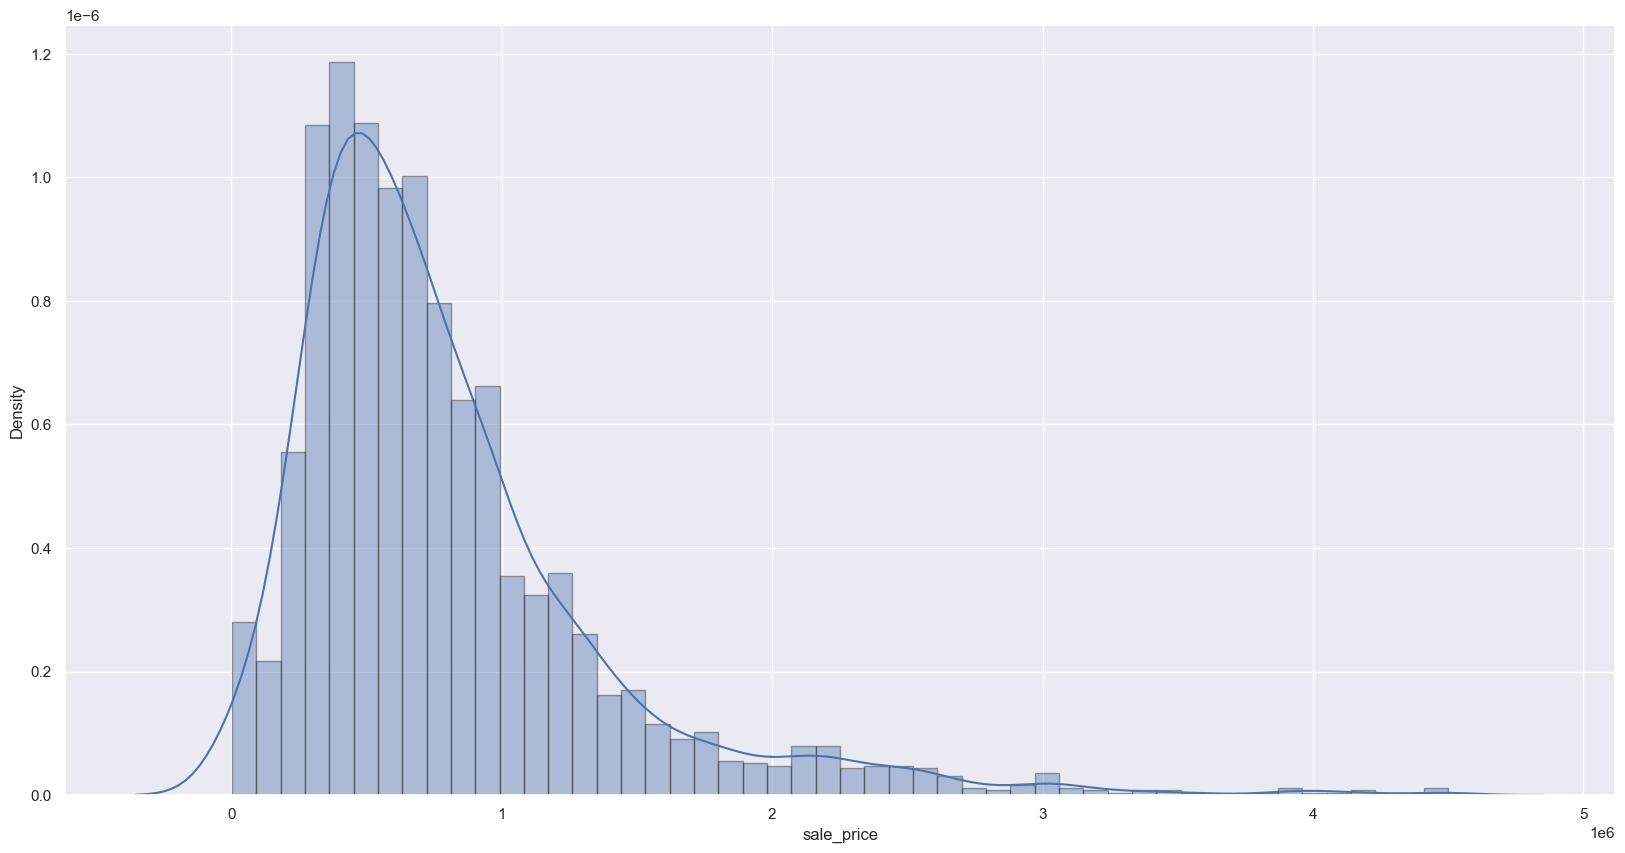

In [48]:
#Criando uma plot distribution com 'sale_price'
plt.figure(figsize = (20,10))
sns.distplot(new_nychouse['sale_price'], kde = True, hist_kws=dict(edgecolor="k"))

Agora vamos analisar a relação de 'sale_price' com as outros informações que temos

# Plots de 'category' com a coluna 'sale_price'

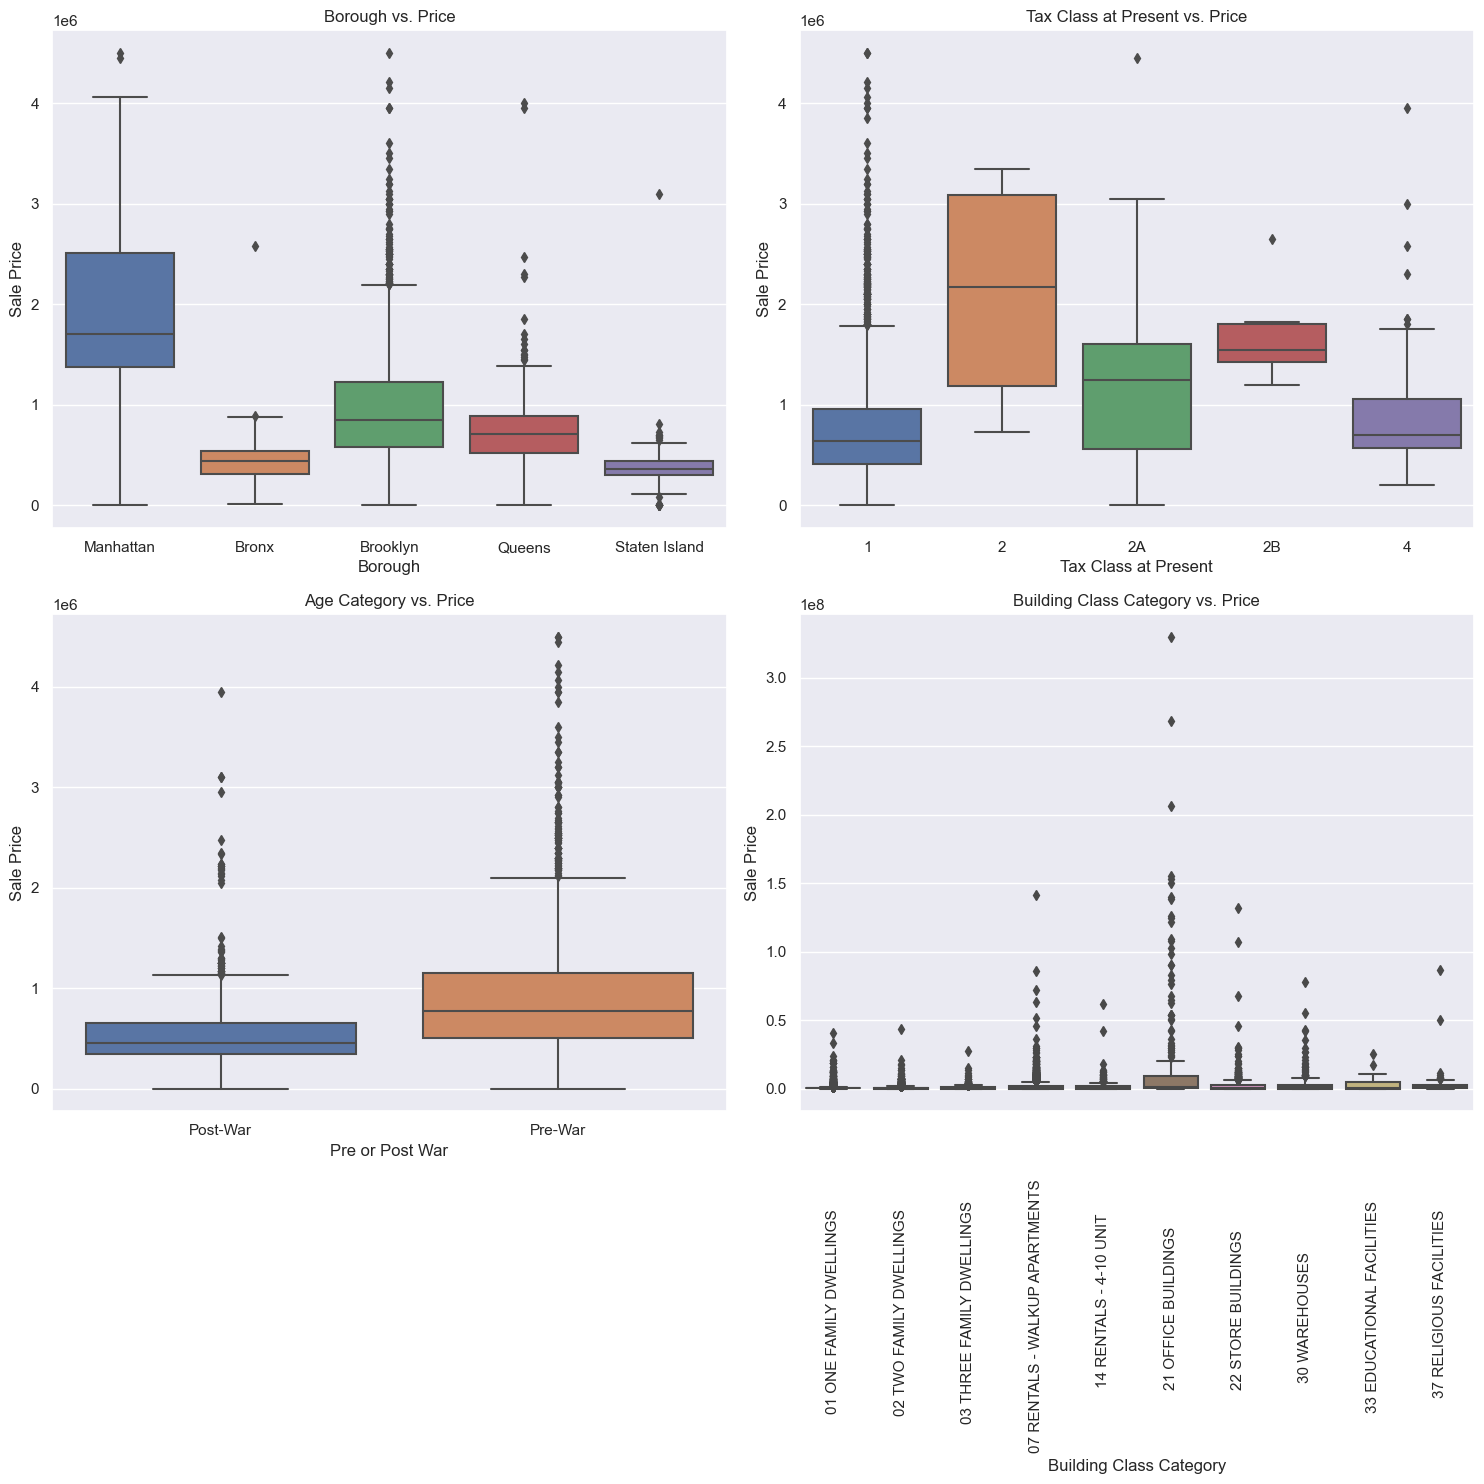

In [49]:
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

#Criando duas listas com valores únicos
order_tax = sorted(new_nychouse['tax_class_at_present'].unique())
order_class = sorted(new_nychouse['building_class_category'].unique())


#plot 'borough category' vs 'price'
sns.boxplot(x = 'borough', y = 'sale_price', data = new_nychouse, ax = axes[0,0])
axes[0,0].set_xlabel('Borough')
axes[0,0].set_ylabel('Sale Price')
axes[0,0].set_title('Borough vs. Price')

#plot 'tax class at present' vs 'price'
sns.boxplot(x = 'tax_class_at_present', y = 'sale_price', data = new_nychouse, ax = axes[0,1], order = order_tax)
axes[0,1].set_xlabel('Tax Class at Present')
axes[0,1].set_ylabel('Sale Price')
axes[0,1].set_title('Tax Class at Present vs. Price')

#plot 'age classification category' vs 'price'
sns.boxplot(x = 'age_category', y = 'sale_price', data = new_nychouse, ax = axes[1,0])
axes[1,0].set_xlabel('Pre or Post War')
axes[1,0].set_ylabel('Sale Price')
axes[1,0].set_title('Age Category vs. Price')

#plot 'building class categories' vs 'price'
sns.boxplot(x = 'building_class_category', y = 'sale_price', data = nychouse, ax = axes[1,1], order = order_class)
axes[1,1].set_xlabel('Building Class Category')
axes[1,1].set_ylabel('Sale Price')
axes[1,1].set_title('Building Class Category vs. Price')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [50]:
nychouse

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age,age_category
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,121,Pre-War
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,108,Pre-War
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,121,Pre-War
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,101,Pre-War
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07,101,Pre-War
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28,23,Post-War
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21,23,Post-War
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05,96,Pre-War
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,...,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21,20,Post-War


In [51]:
#Criando uma lista chamada 'neighborhood' com o Top20 do 'sale_price'
from collections import Counter
neighborhood = list(dict(Counter(new_nychouse.neighborhood).most_common(20)).keys())

avg_sale_prices = []
for i in neighborhood:
    avg_price = np.mean(new_nychouse.sale_price[new_nychouse.neighborhood == i])
    avg_sale_prices.append(avg_price)

C:\Users\thiag\AppData\Local\Temp\ipykernel_4324\2828214211.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x= avg_sale_prices, y= neighborhood , ci=None, palette = "Spectral")


Text(0.5, 1.0, 'Average Property Price in the Top 20 Neighborhoods')

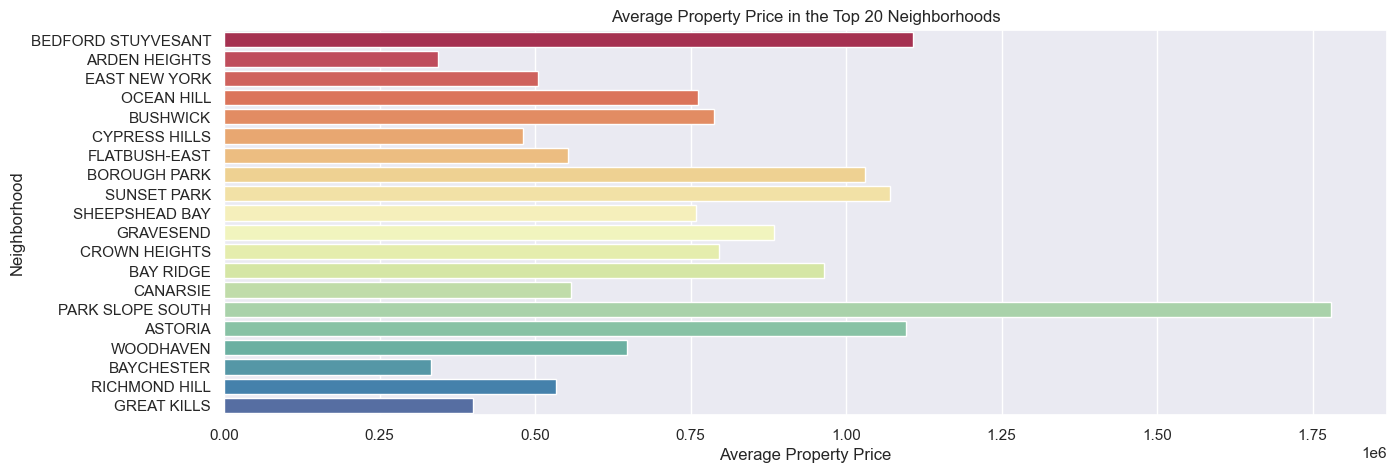

In [52]:
#vizinhanças mais caras com base nos preços médios de propriedades
plt.figure(figsize=(15,5))

ax = sns.barplot(x= avg_sale_prices, y= neighborhood , ci=None, palette = "Spectral")
ax.set_xlabel('Average Property Price')
ax.set_ylabel('Neighborhood')
plt.title('Average Property Price in the Top 20 Neighborhoods')


Manhattan tem os preços de venda mais caros, com um preço médio de venda de cerca de US 1,7 milhão Já o restante dos bairros o preço  esta na média. Brooklyn vem em segundo lugar com um preço médio de cerca de US$ 900 mil, e Queens em terceiro com um preço médio de cerca de US 800 mil. O Bronx e Staten Island têm preços médios em torno de US 500 mil.
Os imóveis identificados como 'Tax Class 2' apresentam o preço medio mais elevado. 
O preço médio das propriedades pré-guerra (construídas antes de 1945) é mais caro (cerca de US 300 mil - US 400 mil) do que as propriedades construídas no pós-guerra.
O preço médio de um imóvel no bairro mais caro é Park Slope South, seguido por Bedford Stuyvesant e Astoria.

# Plots de 'numeros' com a coluna 'sale_price'

In [53]:
new_nychouse.dtypes

borough                                   object
neighborhood                            category
building_class_category                 category
tax_class_at_present                    category
block                                   category
lot                                     category
ease-ment                               category
building_class_at_present               category
address                                 category
apartment_number                        category
zip_code                                category
residential_units                          int64
commercial_units                           int64
total_units                                int64
land_square_feet                         float64
gross_square_feet                        float64
year_built                                 int64
tax_class_at_time_of_sale               category
building_class_at_time_of_sale          category
sale_price                               float64
sale_date           

Text(0.5, 1.0, 'Residential Units vs Sale Price')

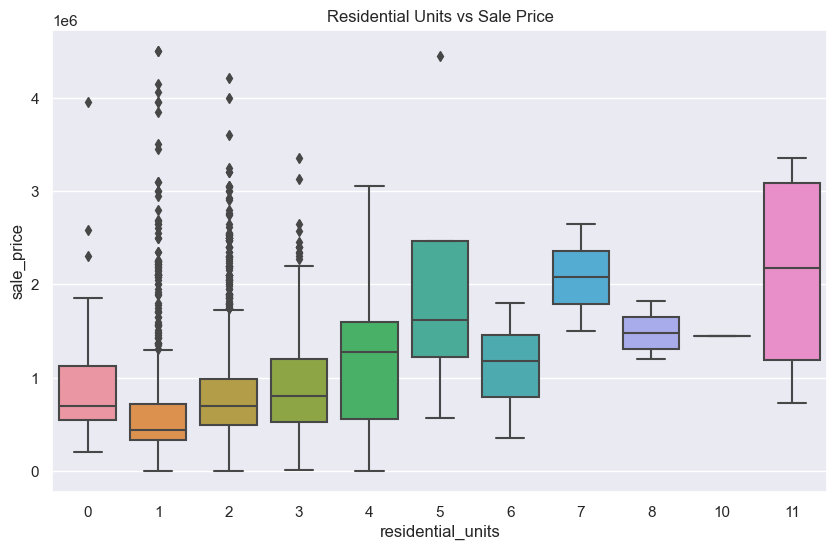

In [54]:
#plot residential units
plt.figure(figsize=(10,6))
sns.boxplot(x='residential_units', y="sale_price", data=new_nychouse)
plt.title('Residential Units vs Sale Price')

O preço médio de venda geralmente aumenta à medida que as unidades residenciais também aumentam.

Text(0.5, 1.0, 'Commercial Units vs Sale Price')

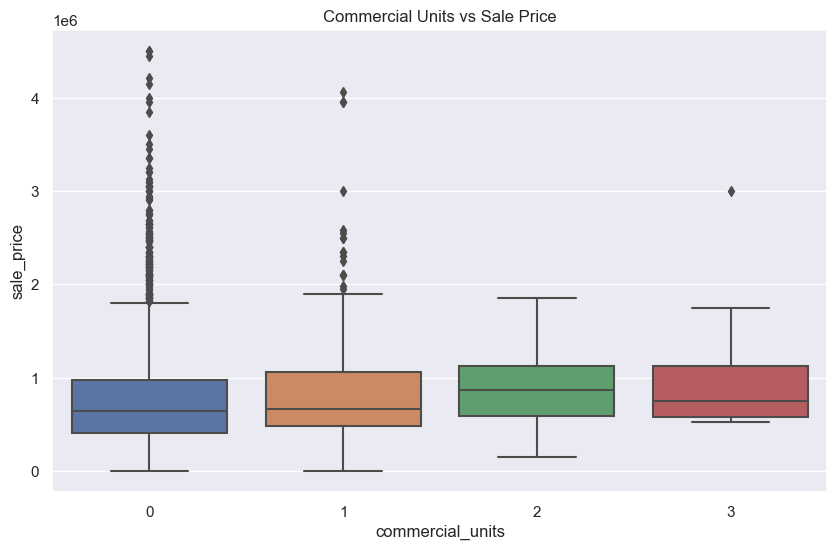

In [55]:
#plot commercial units
plt.figure(figsize=(10,6))
sns.boxplot(x='commercial_units', y="sale_price", data=new_nychouse)
plt.title('Commercial Units vs Sale Price')

Os preços de venda das unidades comerciais geralmente aumentam à medida que aumenta o número de unidades.

Text(0.5, 1.0, 'Age vs. Price')

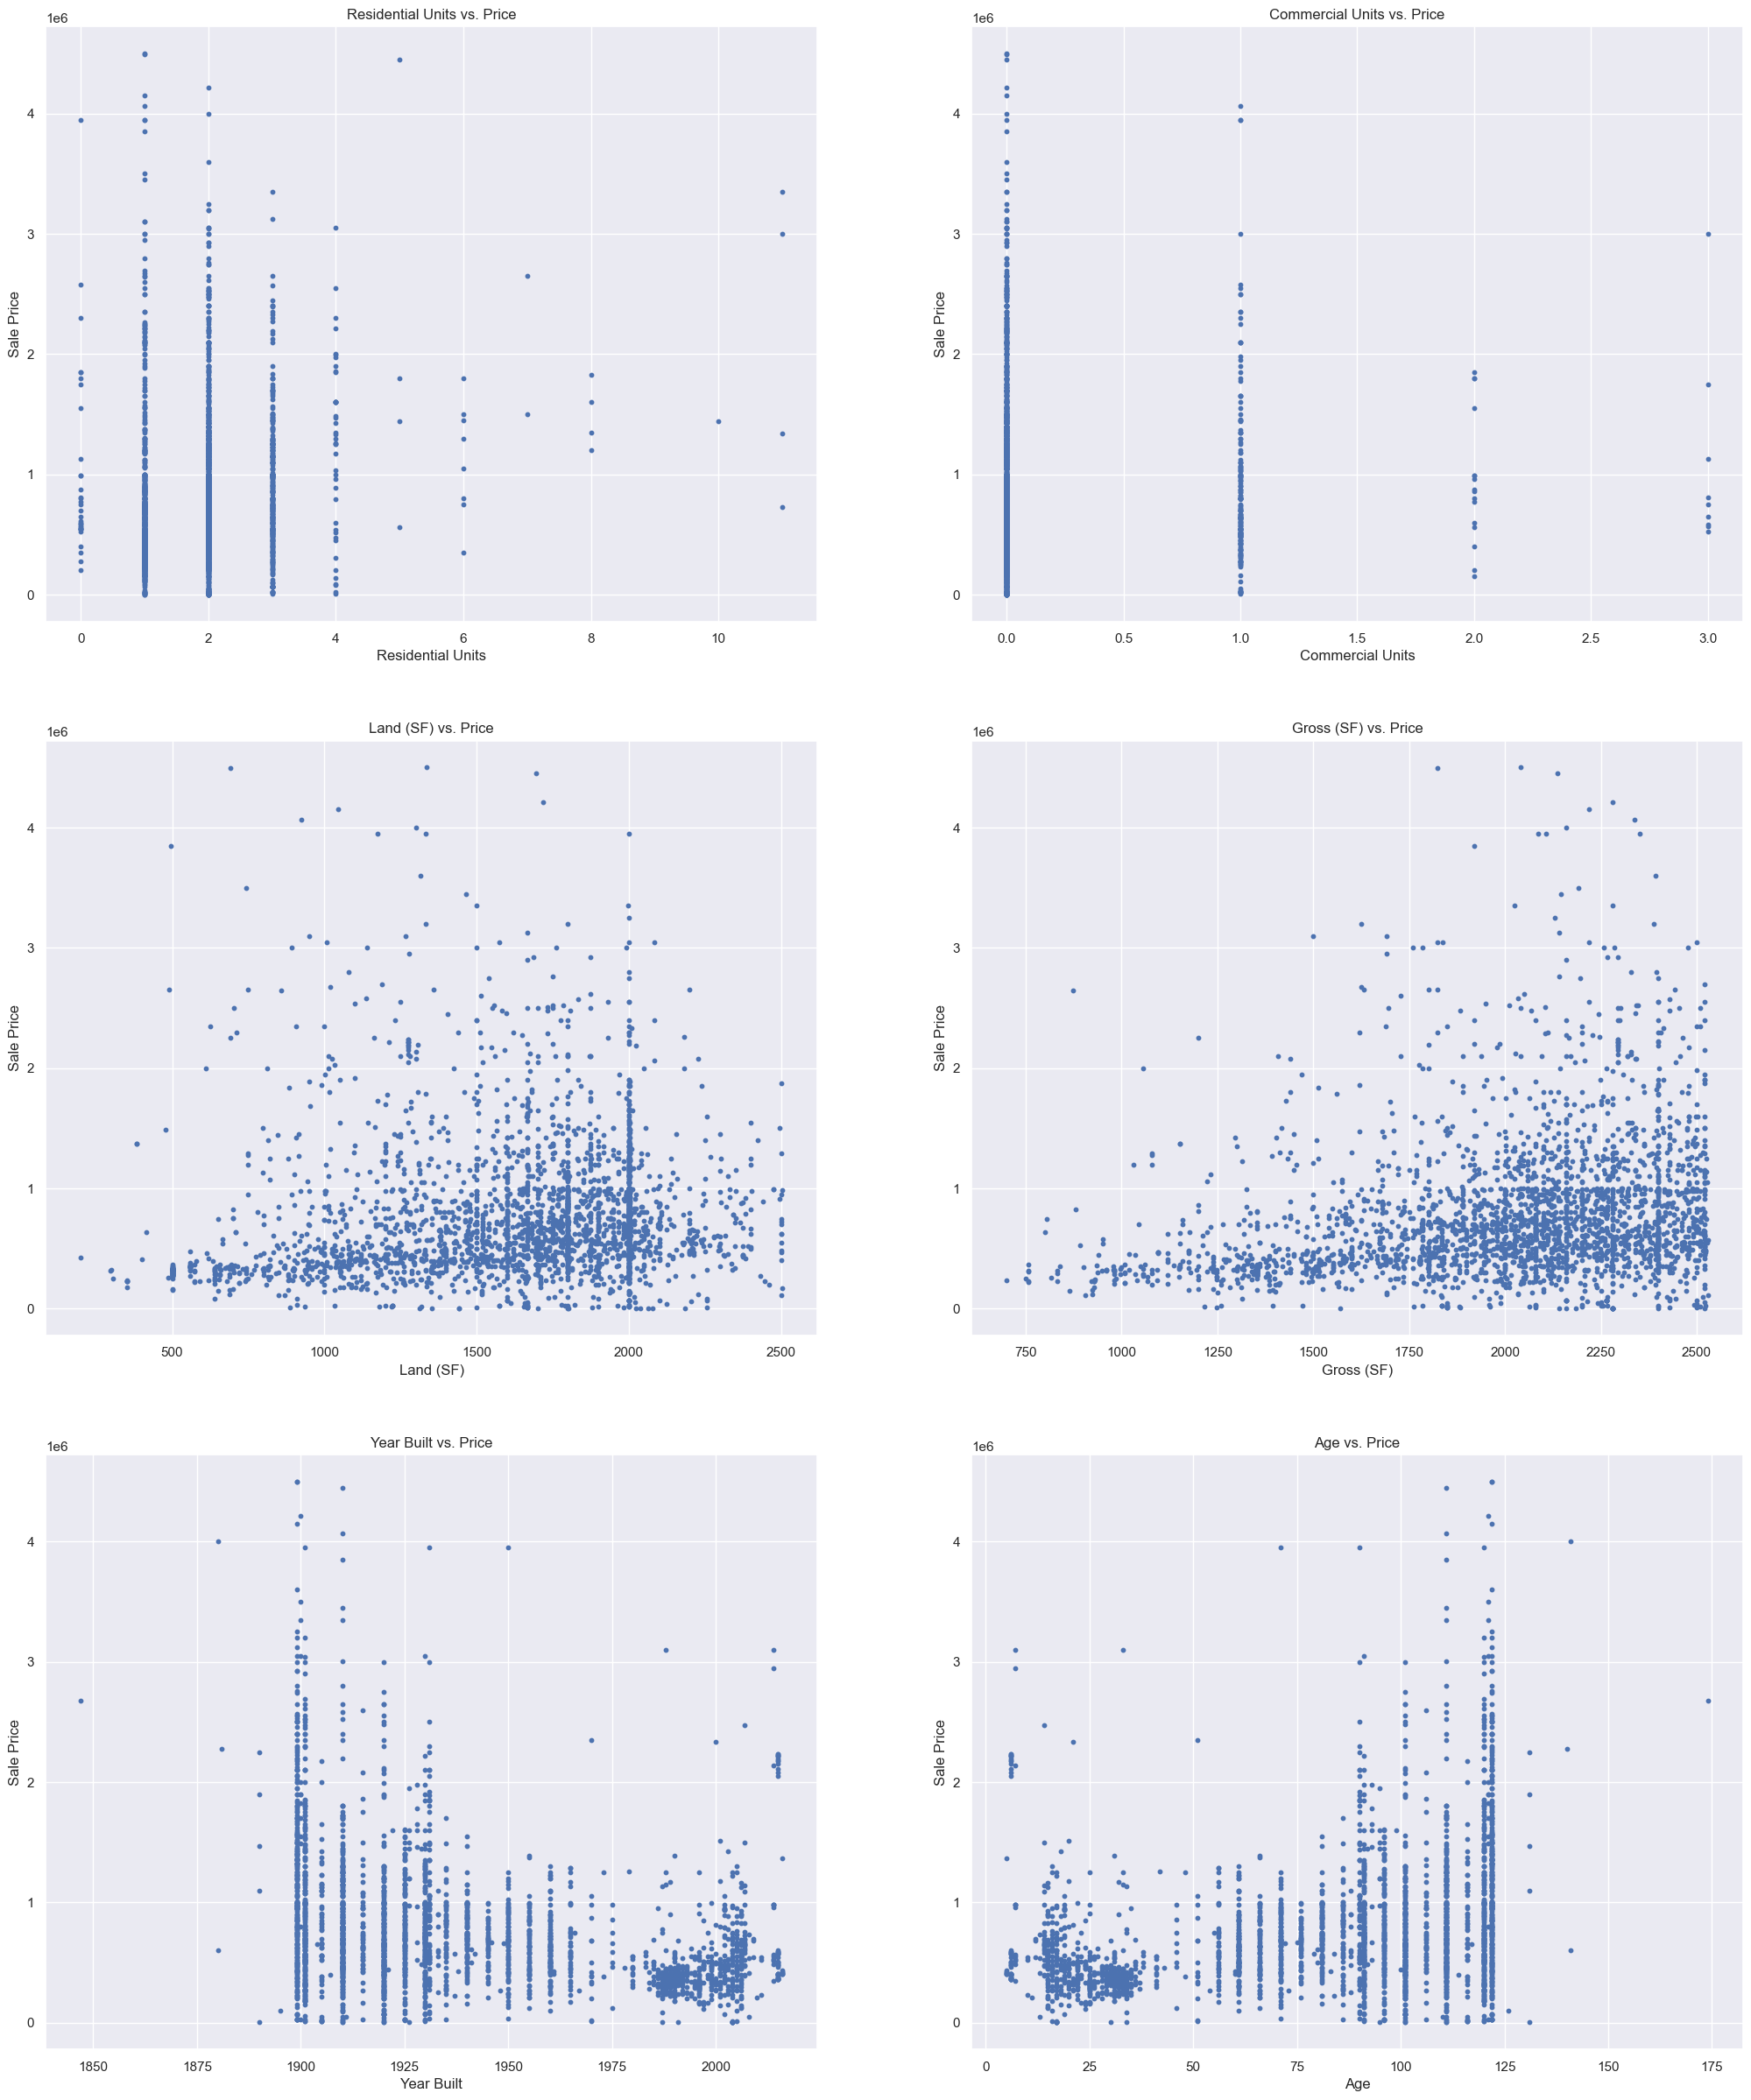

In [56]:
#Suplots of numeric features vs sales price
sns.set_style('darkgrid')
f, axes = plt.subplots(3,2, figsize = (25,30))

# Plot residential units 
axes[0,0].scatter(x = 'residential_units', y = 'sale_price', data = new_nychouse, edgecolor = 'b', s = 10)
axes[0,0].set_xlabel('Residential Units')
axes[0,0].set_ylabel('Sale Price')
axes[0,0].set_title('Residential Units vs. Price')

# Plot commercial units 
axes[0,1].scatter(x = 'commercial_units', y = 'sale_price', data = new_nychouse, edgecolor = 'b', s = 10)
axes[0,1].set_xlabel('Commercial Units')
axes[0,1].set_ylabel('Sale Price')
axes[0,1].set_title('Commercial Units vs. Price')

# Plot land square feet
axes[1,0].scatter(x = 'land_square_feet', y = 'sale_price', data = new_nychouse, edgecolor = 'b', s = 10)
axes[1,0].set_xlabel('Land (SF)')
axes[1,0].set_ylabel('Sale Price')
axes[1,0].set_title('Land (SF) vs. Price')

# Plot gross square feet
axes[1,1].scatter(x = 'gross_square_feet', y = 'sale_price', data = new_nychouse, edgecolor = 'b', s = 10)
axes[1,1].set_xlabel('Gross (SF)')
axes[1,1].set_ylabel('Sale Price')
axes[1,1].set_title('Gross (SF) vs. Price')

# Plot year built
axes[2,0].scatter(x = 'year_built', y = 'sale_price', data = new_nychouse, edgecolor = 'b', s = 10)
axes[2,0].set_xlabel('Year Built')
axes[2,0].set_ylabel('Sale Price')
axes[2,0].set_title('Year Built vs. Price')

# Plot age
axes[2,1].scatter(x = 'age', y = 'sale_price', data = new_nychouse, edgecolor = 'b', s = 10)
axes[2,1].set_xlabel('Age')
axes[2,1].set_ylabel('Sale Price')
axes[2,1].set_title('Age vs. Price')

Existe uma ligeira correlação positiva entre a metragem quadrada bruta de um imóvel(grossSF) de um imóvel e o preço de venda(Sales price). Isso deveria ser esperado e faz sentido se a área da propriedade for maior.
Parece haver uma correlação negativa geral entre o preço de venda(Sales price) e quando a propriedade foi construída(Year built). As propriedades mais novas parecem ser mais baratas do que as propriedades mais antigas.

# Correlação

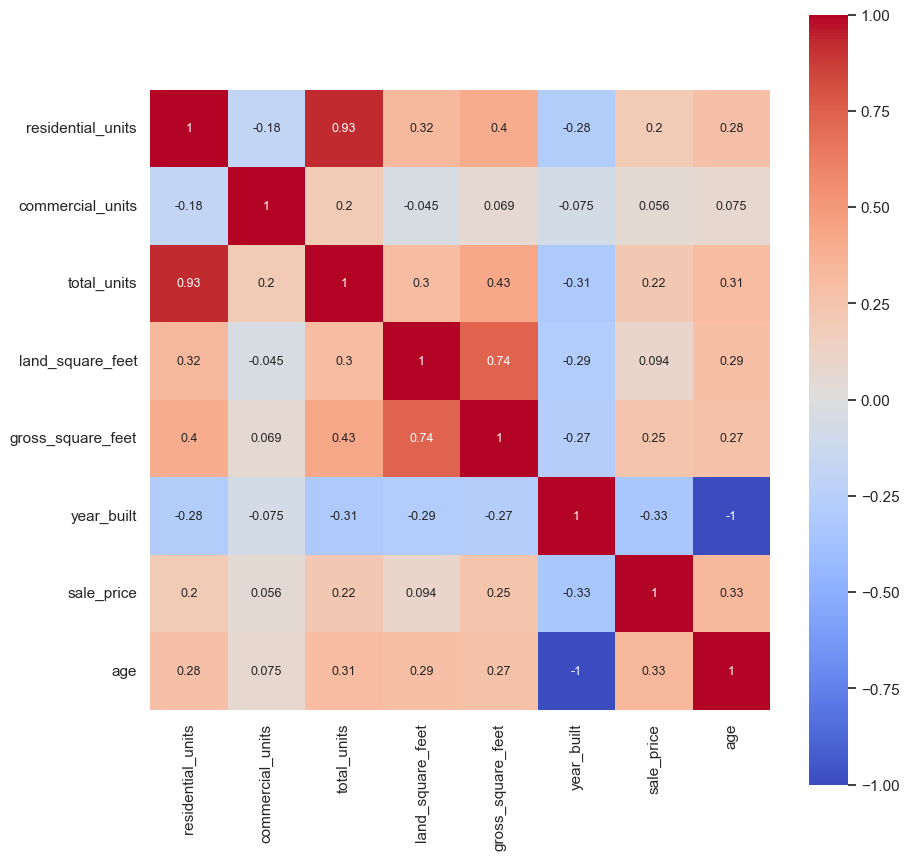

In [57]:
# Selecionar apenas as colunas numéricas
numeric_columns = new_nychouse.select_dtypes(include=['float64', 'int64']).columns

# Calcular a matriz de correlação apenas para as colunas numéricas
corrmat = new_nychouse[numeric_columns].corr()

# Configurar a figura
f, ax = plt.subplots(figsize=(10, 10))

# Criar o heatmap da matriz de correlação
sns.heatmap(corrmat, cmap='coolwarm', square=True, annot=True, annot_kws={"size": 9})
plt.show()

**Correlação positiva fraca**
* Residential Units and Price
* Total Units and Price
* Gross Square Feet and price

**Correlação positiva moderada**
* Age and Price

# Linear Regression

In [58]:
new_nychouse.dtypes

borough                                   object
neighborhood                            category
building_class_category                 category
tax_class_at_present                    category
block                                   category
lot                                     category
ease-ment                               category
building_class_at_present               category
address                                 category
apartment_number                        category
zip_code                                category
residential_units                          int64
commercial_units                           int64
total_units                                int64
land_square_feet                         float64
gross_square_feet                        float64
year_built                                 int64
tax_class_at_time_of_sale               category
building_class_at_time_of_sale          category
sale_price                               float64
sale_date           

In [59]:
# Criando variaveis
X = new_nychouse[['residential_units', 'commercial_units', 'total_units', 'land_square_feet',
                'gross_square_feet', 'year_built', 'age']]

# Criando a variavel alvo
y = new_nychouse['sale_price']

# Train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

In [60]:
# Importando o modelo
from sklearn.linear_model import LinearRegression

# Criando uma instância do modelo de regressão linear
regressor = LinearRegression()

# Treinando o modelo
regressor.fit(X_train,y_train)

LinearRegression()

In [61]:
# Fazendo previsões
y_pred = regressor.predict(X_test)

In [62]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 360313.89778745495
MSE: 263022765190.83688
RMSE: 512857.45114099386


* 'metrics.mean_absolute_error(y_test, y_pred): Calcula o erro médio absoluto entre os valores reais (y_test) e as previsões do modelo (y_pred)
* 'metrics.mean_squared_error(y_test, y_pred): Calcula o erro quadrático médio entre os valores reais (y_test) e as previsões do modelo (y_pred)
* 'np.sqrt(metrics.mean_squared_error(y_test, y_pred)): Calcula a raiz quadrada do erro quadrático médio. O RMSE é frequentemente usado porque fornece uma métrica de erro na mesma unidade da variável de destino

* O RMSE diz o quanto as nossas previsões se desviam, em média, dos valores reais no conjunto de dados. Nesse caso, os valores previstos estão $512.857,45 distantes do valor real.

In [63]:
# Calculando (R^)

print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.21858531389210922


O coeficiente de determinação é uma medida estatística que indica a proporção da variabilidade na variável dependente que é previsível a partir da(s) variável(is) independente(s). O coeficiente de determinação varia de 0 a 1, onde 1 indica um ajuste perfeito do modelo aos dados e 0 indica que o modelo não faz melhor do que simplesmente prever a média da variável dependente para todos os pontos. Portanto, um valor mais próximo de 1 é geralmente desejado, indicando um melhor ajuste do modelo aos dados de teste. No nosso caso o valor foi de 0,21(21%)

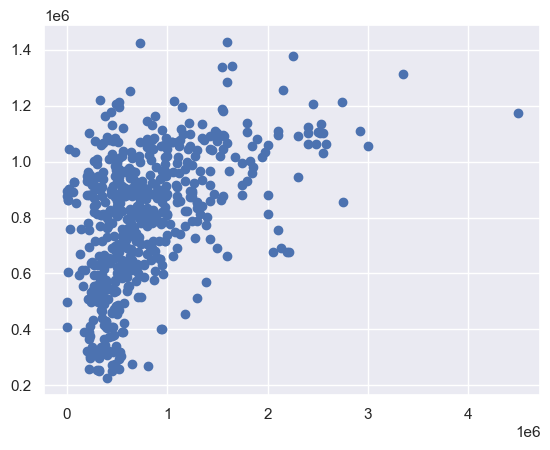

In [64]:
#Gráfico de dispersão
plt.scatter(y_test, y_pred)

C:\Users\thiag\AppData\Local\Temp\ipykernel_4324\719418905.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred))


<Axes: xlabel='sale_price', ylabel='Density'>

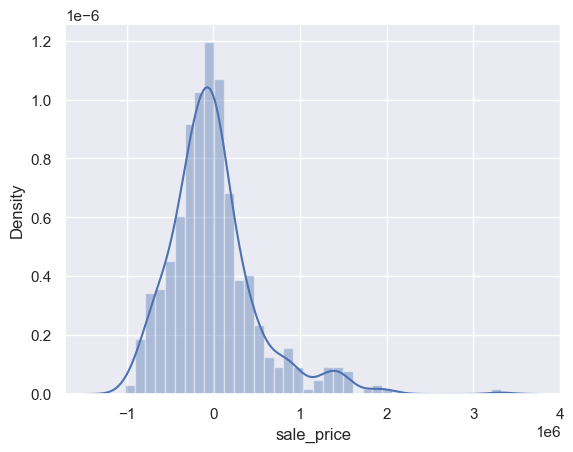

In [65]:
#Histogram
sns.distplot((y_test - y_pred))

In [66]:
#Coeficientes da regressão linear
cdf = pd.DataFrame(data = regressor.coef_, index = X.columns, columns = ['Coefficients'])
cdf

,Coefficients
residential_units,-166237.634699
commercial_units,-178832.537269
total_units,202497.009133
land_square_feet,-341.623752
gross_square_feet,506.202059
year_built,-2307.033849
age,2307.033849


O DataFrame resultante (cdf) fornecerá uma visão tabular dos coeficientes associados a cada característica no modelo de regressão linear. Isso pode ser útil para interpretar a importância relativa de cada característica na previsão da variável alvo. Coeficientes maiores em magnitude indicam uma maior influência na previsão.